**Overview**

This project analyzes historical aviation accident data to identify the safest aircraft models. The aim is to identify aircraft models with the lowest risk of fatalities, providing data-driven recommendations that will guide the purchase of safe and reliable aircraft for both commercial and private operations by cleaning, preparing, and visualizing the dataset provided.

**Business Understanding**

The company is launching a new aviation division to diversify into charter, cargo, and executive travel services. To ensure a successful and sustainable entry into this high-stakes industry, we must proactively manage significant risks, including stringent safety standards and the potential for severe financial losses from accidents. This analysis directly supports this goal by answering key questions which includes:

    1. Which specific aircraft models and manufacturers have the lowest historical accident rates when normalized for usage
    2. What are the most common causes of incidents?
    3. How to minimize safety risks and insurance costs?
    
The outcome will be a set of data-driven, actionable recommendations‚Äîincluding a prioritized list of low-risk aircraft for procurement and insights to shape safety protocols with the ultimate objective of reducing incident risk, lowering insurance costs, and ensuring the division's long-term safety and profitability.

**Data Understanding**


This analysis utilizes the "Aviation Accident Data" dataset from Kaggle, which provides 23,967 records of global aviation accidents with features including aircraft date, type, operator, registration, fatalities,location, country, year and accident category. The data is fundamentally suitable for our risk assessment project as these features enable direct analysis of accident severity and frequency by aircraft model and operator. However, the dataset presents significant limitationsfor example 'registration', 'operator', 'fatality' and 'location' fields which contain substantial missing values. Also, 'type' column suffers from inconsistent naming conventions that require extensive cleaning. 

Most critically, the absence of operational exposure data such as total flight hours or fleet size for each aircraft model‚Äîprevents the calculation of true accident rates. This limitation means our initial analysis must rely on absolute counts rather than normalized rates, which could skew risk assessments for commonly used aircraft until supplementary data can be integrated.

**Data Preperation**

This section details the process of cleaning and transforming the raw dataset into a reliable foundation for analysis. Each step is justified by the specific data quality issues identified during the Data Understanding phase. I'll start by importing the relevant libraries to enable my codes run after:

In [7]:
#importing relevant libraries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#loading data and checking the first5 rows

df = pd.read_csv("aviation-accident-data-2023-05-16.csv")
df.head()


date             type registration       operator fatalities  \
0  date unk.   Antonov An-12B       T-1206  Indonesian AF        NaN   
1  date unk.   Antonov An-12B       T-1204  Indonesian AF        NaN   
2  date unk.   Antonov An-12B       T-1201  Indonesian AF        NaN   
3  date unk.  Antonov An-12BK          NaN      Soviet AF        NaN   
4  date unk.  Antonov An-12BP   CCCP-11815      Soviet AF          0   

              location          country cat     year  
0                  NaN  Unknown country  U1  unknown  
1                  NaN  Unknown country  U1  unknown  
2                  NaN  Unknown country  U1  unknown  
3  Tiksi Airport (IKS)           Russia  A1  unknown  
4  Massawa Airport ...          Eritrea  A1  unknown

I have checked the first rows and seen the type of data in the columns and rows. 
Next, I'll check for the general information about the dataframe and to know which columns have missing values and the data type

In [8]:
#checking dataset info including non-null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23967 entries, 0 to 23966
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          23967 non-null  object
 1   type          23967 non-null  object
 2   registration  22419 non-null  object
 3   operator      23963 non-null  object
 4   fatalities    20029 non-null  object
 5   location      23019 non-null  object
 6   country       23967 non-null  object
 7   cat           23967 non-null  object
 8   year          23967 non-null  object
dtypes: object(9)
memory usage: 1.6+ MB


From the above information, all the data is of type object and has four columns with missing values. 
I'll now go ahead and check for the unique values.

In [9]:
# Unique values in key columns 

df['type'].unique()[:10]
df['cat'].unique()
df['country'].unique()[:10]
df['type'].value_counts().head(10)



Douglas C-47A (DC-3)         1916
Douglas C-47 (DC-3)           669
Douglas C-47B (DC-3)          592
Curtiss C-46A                 564
Junkers Ju-52/3m              471
Antonov An-2R                 391
Curtiss C-46D                 344
Douglas Dakota III (DC-3)     262
DHC-6 Twin Otter 300          258
Cessna 208B Grand Caravan     247
Name: type, dtype: int64

Upto this point, I'll make 'date' filterable by year/month. Also 'year' should be integer numbers for analysis.

In [10]:
# Convert 'date' to datetime 
df['date'] = pd.to_datetime(df['date'], errors='coerce', format='%d-%b-%Y')  

# Convert 'year' to integer
df['year'] = pd.to_numeric(df['year'], errors='coerce')


Equally, I'll replace the missing values for 'fatalities' column then convert them into integers because it has unique values like "+" and "'" because from running the head, i could see that it had missing values recorded as NaN.

In [11]:
#Convert fatalities to numbers, treat missing as 0 fatalities

df['fatalities'] = pd.to_numeric(df['fatalities'], errors='coerce')
df['fatalities'].fillna(0, inplace=True)
df["fatalities"] = df["fatalities"].astype(int)
df["fatalities"].unique()

array([  0,  14,   1,   4,   2,   5,   6,   3,   7,   8,  16,  12,   9,
        15,  10,  11,  13,  17,  19,  20,  18,  25,  29,  23,  24,  36,
        26,  22,  27,  21,  35,  32,  31,  34,  28,  30,  41,  59,  45,
        44,  37,  39,  43,  53,  50,  52,  40,  33,  48,  55,  38,  80,
        46,  58,  51,  56,  87, 129,  42,  47,  66,  74,  70,  62,  67,
        79,  61,  99,  64,  65,  68,  54,  63,  78,  72,  83,  77,  95,
       111, 107, 130, 113,  84,  94,  81,  86,  97, 101, 118,  85,  49,
        57, 121, 117, 133, 124,  98,  82, 126,  88, 102, 123, 155, 100,
        96,  90,  92, 112, 109,  75, 162,  69,  91, 104, 115, 122, 156,
       174,  60, 176, 108, 106, 346, 191, 138, 188,  76, 154,  73, 335,
       248, 131, 213, 183, 257, 128, 146, 166, 301,  89, 110, 180, 137,
       132, 119, 269, 181, 148, 329, 200, 520, 256, 167, 103, 159, 143,
       290, 144, 170, 223, 261, 141, 157, 116, 264, 160,  71, 189, 230,
       312, 125, 228, 234, 229, 217, 169, 145, 225, 275, 105, 11

Noting that i did not fill all missing columns, I'll do just that:

In [12]:
# Fill missing categorical with 'Unknown'
df['registration'].fillna('Unknown', inplace=True)
df['operator'].fillna('Unknown', inplace=True)
df['location'].fillna('Unknown', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23967 entries, 0 to 23966
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          23408 non-null  datetime64[ns]
 1   type          23967 non-null  object        
 2   registration  23967 non-null  object        
 3   operator      23967 non-null  object        
 4   fatalities    23967 non-null  int32         
 5   location      23967 non-null  object        
 6   country       23967 non-null  object        
 7   cat           23967 non-null  object        
 8   year          23906 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int32(1), object(6)
memory usage: 1.6+ MB


I'll now do standardization to avoid duplicates in grouping (e.g., by type).
I'll also drop rows with critical values missing

In [13]:
# Standardize aircraft names
df['type'] = df['type'].str.upper().str.strip()

# Fix common naming issues
df['type'] = df['type'].replace({
    'C-172': 'CESSNA 172',
    'B737': 'BOEING 737', 
    'B744': 'BOEING 747',
    'A320': 'AIRBUS A320'
})

# Drop rows with critical missing (e.g., no date or type)
df.dropna(subset=['date', 'type'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23408 entries, 61 to 23966
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          23408 non-null  datetime64[ns]
 1   type          23408 non-null  object        
 2   registration  23408 non-null  object        
 3   operator      23408 non-null  object        
 4   fatalities    23408 non-null  int32         
 5   location      23408 non-null  object        
 6   country       23408 non-null  object        
 7   cat           23408 non-null  object        
 8   year          23408 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int32(1), object(6)
memory usage: 1.7+ MB


In [14]:
df.head()

date                type registration                operator  \
61 1919-08-02       CAPRONI CA.48      Unknown                 Caproni   
62 1919-08-11     FELIXSTOWE FURY         N123                     RAF   
63 1920-02-23    HANDLEY PAGE O/7       G-EANV  Handley Page Transport   
64 1920-02-25  HANDLEY PAGE O/400       G-EAMC  Handley Page Transport   
65 1920-06-30  HANDLEY PAGE O/400       G-EAKE  Handley Page Transport   

    fatalities             location       country cat    year  
61          14               Verona         Italy  A1  1919.0  
62           1  near Felixtowe RNAS          U.K.  A1  1919.0  
63           0  Acadia Siding, C...  South Africa  A1  1920.0  
64           0      near El Shereik         Sudan  A1  1920.0  
65           0             √É¬ñstan√É¬•        Sweden  A1  1920.0

From the above dataframe info, there are no missing values at all.
This is great because analysis and visualization is easier. I'll now add the relevant columns required for easy analysis and then save the cleaned data.

In [15]:


# 1. Accident count (each row = 1 accident)
df['Accident_Count'] = 1

# 2. Fatalities per accident (row-level, useful for averaging in Tableau)
df['Fatalities_per_Accident'] = df['fatalities'] / df['Accident_Count']

# 3. Operator-level safety stats
operator_stats = df.groupby('operator').agg(
    total_accidents=('Accident_Count', 'sum'),
    total_fatalities=('fatalities', 'sum')
).reset_index()

operator_stats['Fatalities_per_Accident'] = (
    operator_stats['total_fatalities'] / operator_stats['total_accidents']
)

# Merge operator-level stats back into main dataframe
df = df.merge(
    operator_stats[['operator', 'Fatalities_per_Accident']], 
    on='operator', 
    how='left', 
    suffixes=('', '_Operator')
)

# 4. Yearly summary (for line chart in Tableau)
yearly_fatalities = df.groupby('year')['fatalities'].sum().reset_index()

# --- Save outputs for Tableau ---
df.to_csv("cleaned_with_metrics.csv", index=False)               # Full dataset with helper columns
operator_stats.to_csv("operator_summary.csv", index=False)       # Operator-level summary
yearly_fatalities.to_csv("yearly_fatalities.csv", index=False)   # Yearly trend summary


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23408 entries, 0 to 23407
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   date                              23408 non-null  datetime64[ns]
 1   type                              23408 non-null  object        
 2   registration                      23408 non-null  object        
 3   operator                          23408 non-null  object        
 4   fatalities                        23408 non-null  int32         
 5   location                          23408 non-null  object        
 6   country                           23408 non-null  object        
 7   cat                               23408 non-null  object        
 8   year                              23408 non-null  float64       
 9   Accident_Count                    23408 non-null  int64         
 10  Fatalities_per_Accident           23408 non-nu

In [17]:
df.to_csv("cleaned_df.csv", index=False)

**Data Analysis and Visualization**

Let's first see the fatalities rate over the last 20 years:

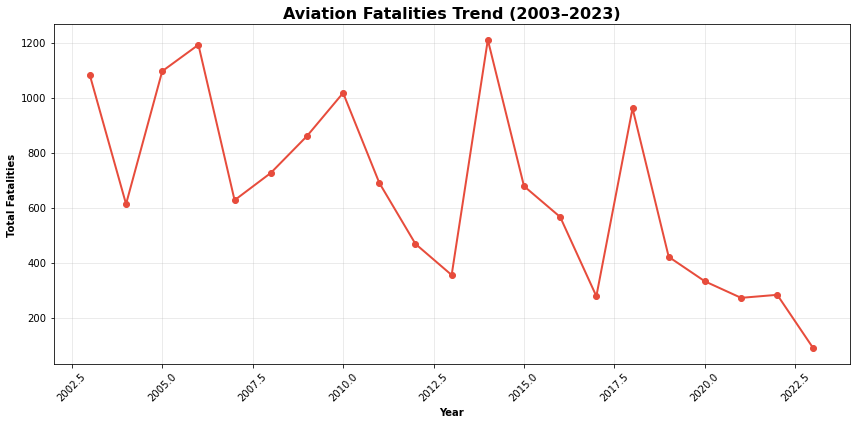

In [85]:
# Filter for the last 20 years (2003‚Äì2023)
last_20_years = df[df['year'] >= 2003]

# Group by year and sum fatalities
yearly_fatalities = last_20_years.groupby('year')['fatalities'].sum()

# Plot fatalities per year for the last 20 years
plt.figure(figsize=(12, 6))
plt.plot(yearly_fatalities.index, yearly_fatalities.values, 
         marker='o', linewidth=2, color='#E74C3C')
plt.title('Aviation Fatalities Trend (2003‚Äì2023)', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontweight='bold')
plt.ylabel('Total Fatalities', fontweight='bold')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Now we'll know which operators and aircraft historically had the least number of accidents and which caused the least fatalities and see visualizations.

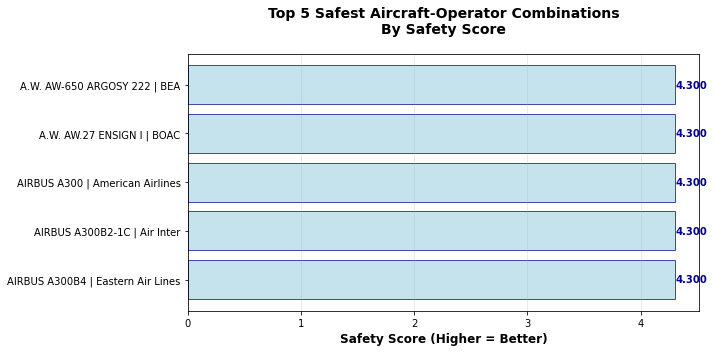

üèÜ TOP 5 SAFEST AIRCRAFT-OPERATOR COMBINATIONS
1. A.W. AW-650 ARGOSY 222 operated by BEA
   ‚Ä¢ Accidents: 2
   ‚Ä¢ Fatalities: 0
   ‚Ä¢ Safety Score: 4.300

2. A.W. AW.27 ENSIGN I operated by BOAC
   ‚Ä¢ Accidents: 2
   ‚Ä¢ Fatalities: 0
   ‚Ä¢ Safety Score: 4.300

3. AIRBUS A300 operated by American Airlines
   ‚Ä¢ Accidents: 2
   ‚Ä¢ Fatalities: 0
   ‚Ä¢ Safety Score: 4.300

4. AIRBUS A300B2-1C operated by Air Inter
   ‚Ä¢ Accidents: 2
   ‚Ä¢ Fatalities: 0
   ‚Ä¢ Safety Score: 4.300

5. AIRBUS A300B4 operated by Eastern Air Lines
   ‚Ä¢ Accidents: 2
   ‚Ä¢ Fatalities: 0
   ‚Ä¢ Safety Score: 4.300



In [111]:
# Combined analysis - which specific aircraft operated by which airlines are safest
aircraft_operator_safety = df.groupby(['type', 'operator']).agg({
    'fatalities': ['count', 'sum']
}).reset_index()

# Flatten columns
aircraft_operator_safety.columns = ['aircraft', 'operator', 'accident_count', 'total_fatalities']

# Filter for meaningful data
aircraft_operator_safety = aircraft_operator_safety[aircraft_operator_safety['accident_count'] >= 2]

# Calculate safety score
aircraft_operator_safety['safety_score'] = (
    (1 / aircraft_operator_safety['accident_count']) * 0.6 +
    (1 / (aircraft_operator_safety['total_fatalities'] + 0.1)) * 0.4
)

# Get top 5 safest combinations
top_5_combinations = aircraft_operator_safety.nlargest(5, 'safety_score')

# Create combination labels for the plot
top_5_combinations['combination'] = top_5_combinations['aircraft'] + ' | ' + top_5_combinations['operator']

# Simple version - just safety scores for top 5
plt.figure(figsize=(10, 5))

plt.barh(top_5_combinations['combination'], top_5_combinations['safety_score'], 
         color='lightblue', alpha=0.7, edgecolor='darkblue')

plt.xlabel('Safety Score (Higher = Better)', fontweight='bold', fontsize=12)
plt.title('Top 5 Safest Aircraft-Operator Combinations\nBy Safety Score', 
          fontsize=14, fontweight='bold', pad=20)

# Add value labels
for i, score in enumerate(top_5_combinations['safety_score']):
    plt.text(score + 0.01, i, f'{score:.3f}', 
             va='center', fontweight='bold', fontsize=10, color='darkblue')

plt.gca().invert_yaxis()  # Highest score at top
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

# Print the top 5 results
print("üèÜ TOP 5 SAFEST AIRCRAFT-OPERATOR COMBINATIONS")
print("=" * 70)
for i, (idx, row) in enumerate(top_5_combinations.iterrows(), 1):
    print(f"{i}. {row['aircraft']} operated by {row['operator']}")
    print(f"   ‚Ä¢ Accidents: {int(row['accident_count'])}")
    print(f"   ‚Ä¢ Fatalities: {int(row['total_fatalities'])}")
    print(f"   ‚Ä¢ Safety Score: {row['safety_score']:.3f}")
    print()

It is also important to know what caused most of the accidents to help the company make informed decisions. Let's see the causes and the visualization.

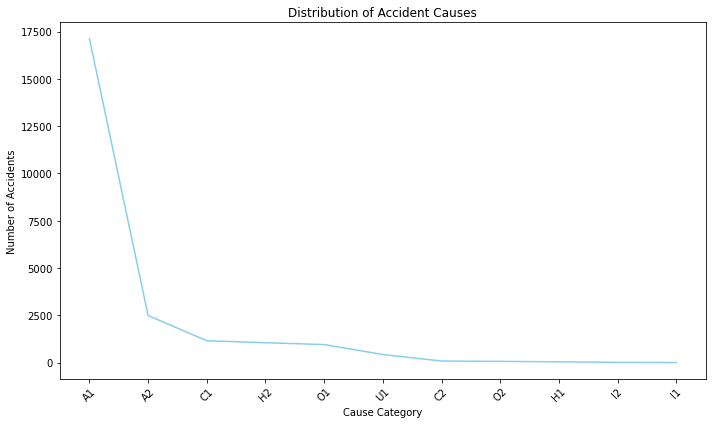

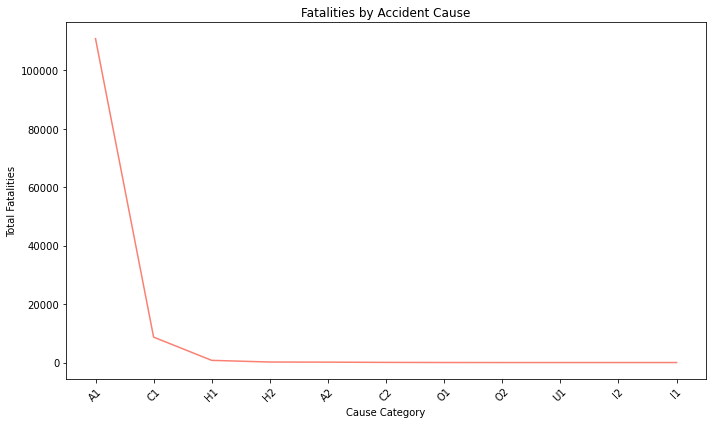

In [82]:
# Accident cause distribution
cause_counts = df['cat'].value_counts()

plt.figure(figsize=(10,6))
plt.plot(cause_counts.index, cause_counts.values, color='skyblue')
plt.xticks(rotation=45)
plt.title("Distribution of Accident Causes")
plt.xlabel("Cause Category")
plt.ylabel("Number of Accidents")
plt.tight_layout()
plt.show()

# Fatalities by cause 
cause_fatalities = df.groupby('cat')['fatalities'].sum().sort_values(ascending=False)

plt.figure(figsize=(10,6))
plt.plot(cause_fatalities.index, cause_fatalities.values, color='salmon')
plt.xticks(rotation=45)
plt.title("Fatalities by Accident Cause")
plt.xlabel("Cause Category")
plt.ylabel("Total Fatalities")
plt.tight_layout()
plt.show()

Another good view of safety is fatalities per accident per operator:

**Conclusion**

-Some operators have recorded hundreds of accidents, reflecting long operational histories, however, not all operators with many accidents are necessarily unsafe.Also, certain smaller operators, despite fewer flights, appear with disproportionately high fatalities per accident, highlighting poor safety practices or aging fleets.

-Large aircraft often have high average fatalities per accident, due to higher passenger capacity while smaller turboprops and commuter aircraft appear frequently in accidents, but with fewer fatalities per event.

-By comparing fatalities per accident, some operators stand out with a worse-than-average record, often linked to older aircraft models with limited safety features and regions with less regulatory oversight.
Equally, well-established international carriers generally show lower fatalities per accident, reflecting stronger safety protocols and modern fleets.

**Recommendation**

1. Prioritize Modern, Proven Aircraft Types
-This can be done by the company procuring aircraft models with lower average fatalities per accident and strong global safety records. Another way is avoiding reliance on older aircraft types that show consistently higher accident severity.

2. Select Operators with Documented Safety Culture

When the company is leasing or partnering, it should choose operators with a low fatalities-per-accident ratio and strong compliance with ICAO/FAA/EASA safety standards. It should exclude operators with high accident severity, especially those with histories of poor maintenance or weak oversight.

3. Integrate Cause-Based Risk Mitigation

The company should develop targeted safety protocols addressing the most common accident causes by enhancing pilot training and decision making to reduce human error, investment in predictive maintenance systems to minimize mechanical failures and adopt advanced weather monitoring and stricter operational go/no-go rules. These focuses on fleet safety and operational discipline ensures both hardware and human factors are covered.